
# Advisory mission for the Boston municipal authorities


![title](assets/boston_logo.png)

**Welcome to the Decision Science challenge of your data certification exam!**

⚠️ This challenge validates 2 blocks of the RNCP certification _Développeur en intelligence artificielle_ exam:  

**Block 1:**  *Analyse exploratoire et descriptive de la donnée*  
- 75% validated by Section 1 - Analysis of the mayor's team
- 25% validated by Section 2 - Analysis for the police department

**Block 2:**  *Développement et Gestion de projet en IA*  
- 100% validated by Section 2 - Analysis for the police department

To start, here is an overview of the `decision_science` directory:

- the `boston_crimes.ipynb` notebook that you currently have under your eyes is the main document. You will find all the instructions here and except when it is explicitly specified, you should provide all your answers in this notebook;


- the `data` and `db` folders will be filled-in throughout the exercise respectively with `.csv` datasets and a `.sqlite` file, for you to run all your analyses; 


- you will not have to interact with the `assets` folder for this exercise;


- the `tests` folder will contain all the `.pickle` files that will be saved throughout the exercise with your key findings. Please run all the "Save your results" cells when completing the exercise!

⚠️ **Important remark** before you dive into the exercise. This notebook is quite long and it is easy to get lost in it: take full advantage of the collapsible headers and of the table of content. If you have not yet activated these Jupyter Notebook extensions, you may consider doing so now!

# Imports

You can use this section to run your imports in a centralised manner throughout the exercise.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [2]:
# Useful import for data collection
import sqlite3

In [3]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [4]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Useful imports to estimate regression models
import statsmodels.formula.api as smf

# 1. Analysis for the mayor's team (4h)

# 2. Analysis for the police department (4h)

## 2.1 Start with a fresh dataset

You will start from a fresh dataset, that corresponds more or less to the `incident_reports` table of the database.

In [6]:
# Run this cell to download the datasets in the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  9108k      0  0:00:02  0:00:02 --:--:-- 9108k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0   1903      0 --:--:-- --:--:-- --:--:--  1908


In [7]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [9]:
# Group the data by district and sum the offenses for each type
df_summed = data.groupby('NAME')['INCIDENT_NUMBER'].count()
df_summed_sorted = df_summed.sort_values(ascending=False)

my_df = df_summed_sorted.reset_index(name='value')
my_df

,NAME,value
0,Roxbury,38877
1,Dorchester,32875
2,South End,31258
3,Mattapan,28331
4,Downtown,26260
5,South Boston,16617
6,Brighton,13788
7,Jamaica Plain,12802
8,Hyde Park,12551
9,East Boston,9691


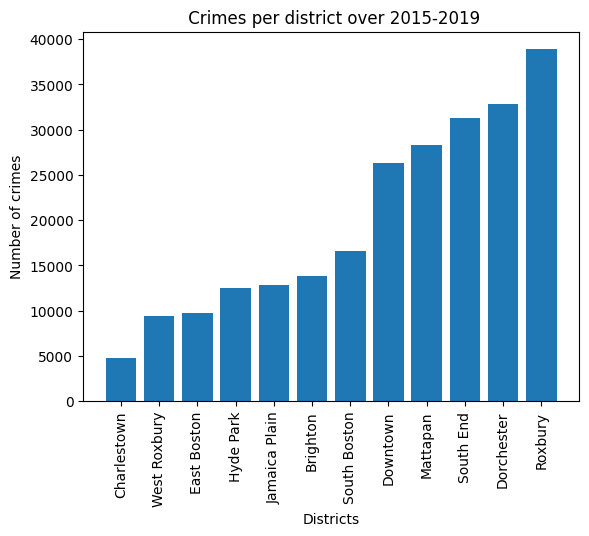

In [10]:
import seaborn as sns
# plt.plot(my_df['NAME'], my_df['value'], c='red', ls='--', lw='0.5')
# sns.histplot(x="NAME", data=my_df); #seaborn bar plot
plt.bar(my_df['NAME'], my_df['value']);
plt.xlabel("Districts")
plt.ylabel("Number of crimes")
plt.gca().invert_xaxis()
plt.xticks(my_df['NAME'], rotation=90)
plt.title(' Crimes per district over 2015-2019');
plt.show()

In [12]:
data1_df=data.copy()
data1_df=data1_df.drop(columns=['OCCURRED_ON_DATE'])
data1_df=data1_df.drop(columns=['OFFENSE_CODE_GROUP'])
data1_df=data1_df.drop(columns=['LAT'])
data1_df=data1_df.drop(columns=['LONG'])
data1_df=data1_df.drop(columns=['LAT_POLICE_STATION'])
data1_df=data1_df.drop(columns=['LONG_POLICE_STATION'])
print(data1_df.head()); print(data1_df.shape)

  INCIDENT_NUMBER  SHOOTING     NAME
0      I192068249         0  Roxbury
1      I182074094         0  Roxbury
2      I182054888         0  Roxbury
3      I182054888         0  Roxbury
4      I182054888         0  Roxbury
(237221, 3)


In [34]:
data2_df=data1_df.groupby(['NAME', 'SHOOTING']).agg(lambda x : x.value_counts().sum())
data2_df = data2_df.reset_index()
df_filtered = data2_df[data2_df['SHOOTING'] == 1]
df_filtered=df_filtered.drop(columns=['SHOOTING'])

print(df_filtered)
# data2_df.dtypes

             NAME  INCIDENT_NUMBER
1        Brighton               24
3     Charlestown                5
5      Dorchester              239
7        Downtown               19
9     East Boston               23
11      Hyde Park               40
13  Jamaica Plain               86
15       Mattapan              297
17        Roxbury              487
19   South Boston               47
21      South End               68
23   West Roxbury               20


In [37]:
df_sorted = df_filtered.sort_values(by='INCIDENT_NUMBER',ascending=False)
df_sorted

,NAME,INCIDENT_NUMBER
17,Roxbury,487
15,Mattapan,297
5,Dorchester,239
13,Jamaica Plain,86
21,South End,68
19,South Boston,47
11,Hyde Park,40
1,Brighton,24
9,East Boston,23
23,West Roxbury,20


/home/pguitteny/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


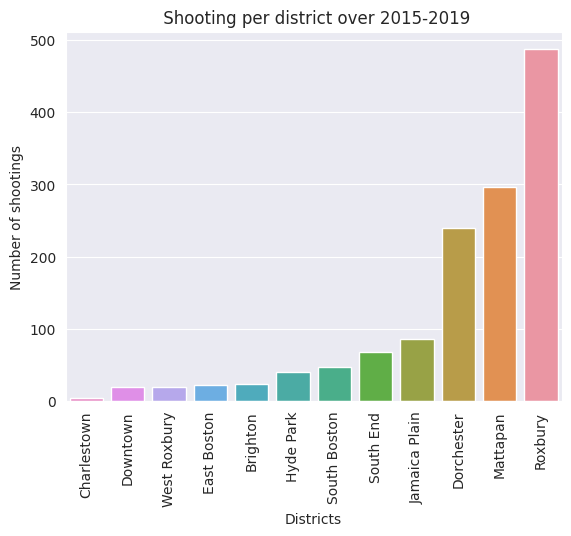

In [40]:
sns.set_style('darkgrid')

sns.barplot(df_sorted['NAME'], df_sorted['INCIDENT_NUMBER'])
plt.xlabel("Districts")
plt.ylabel("Number of shootings")
plt.gca().invert_xaxis()
plt.xticks(rotation='vertical')
plt.title(' Shooting per district over 2015-2019');
plt.show()

# 2.2 Short presentation (3h)

🚨 (REQUIRED TO VALIDATE THE CERTIFICATION)

Using the latest dataset that you loaded, your mission is now to prepare 5 slides (including a title slide) that you would present to the head of the Police Department.  
You should focus on including the output of the two "Further data manipulations" tasks in your presentation.  

⚠️  You can use any presentation editor of your choice, but **the slides must be shared either in HTML or in PDF format and saved in the current directory**

Before you get started, here are four small pieces of advice:

- to prepare your data visualisations, do not hesitate to create a separate, blank notebook; 


- pay particular attention to the readability and the clarity of your legends, titles, charts and tables; 


- the Pandas `resample` method might be useful if you want to plot time trends;


- keep in mind that you are working with real data and sometimes, data are not very talkative. Do not feel discouraged if your charts do not provide revolutionary insights: typically, an absence of trend is a substantial piece of information!

Good luck in changing Boston residents' lives!

# A word of conclusion

Congratulations for going through the exercise 🎉

If you wish to pursue your analysis at some point, note that all datasets (and many others) are publicly available online, on the [Analyze Boston](https://data.boston.gov) website.

Besides, if you are interested in the topic, you can start by reading the work of Nobel Prize laureate Gary Becker, who was the first to model crime as a rational phenomenon, similarly to an economic decision. This model, although it has limitations, marked a breakthrough in the study of crime and paved the way for many empirical studies that further analysed the socio-economic determinants of illegal activities. 

👉 [Link](https://olis.leg.state.or.us/liz/2017R1/Downloads/CommitteeMeetingDocument/125036) to download a full-text version of "Crime and Punishment: An Economic Approach" by Becker (1968)